In [1]:
%reload_ext autoreload
%autoreload 2
# BASE
import os
import json
# COOL
from pyeed.core import ProteinRecord
from pyeed.core import DNARecord
from pyeed.network import SequenceNetwork

In [2]:
current_path = os.getcwd()

input_folder_filters_regions = os.path.join(current_path, "data", "filtered_protein_fetch_ids_all")
output_folder_filters = os.path.join(current_path, "data", "images_sequence_network", 'network.cys')
# os.makedirs(output_folder_filters, exist_ok=True)

In [3]:
# we read in the proteins and ids from input folder
protein_dic = {}

for file in os.listdir(input_folder_filters_regions):
    if file.endswith(".json"):
        with open(os.path.join(input_folder_filters_regions, file), "r") as f:
            # read in the file as a dic
            file_data = json.load(f)
            protein_dic[file.split('.')[0]] = {
                'protein': ProteinRecord.from_json_string(file_data['protein']), 
                'alignment': file_data['alignment'],
                'TEM-Domain': file_data['TEM-Domain'],
                'TEM-Domain-Diff': file_data['TEM-Domain-Diff'],
                'dna': DNARecord.from_json_string(file_data['dna']),
                }

print(len(protein_dic))
print(protein_dic['TEM-1'].keys())

210
dict_keys(['protein', 'alignment', 'TEM-Domain', 'TEM-Domain-Diff'])


In [4]:
print(protein_dic['TEM-11']['protein'].coding_sequence)

[Region(id='AF397067.1', url=None, accession_id=None, name=None, start=1, end=861, json_ld_type=['Region'], json_ld_context={'Region': 'https://github.com/PyEED/pyeed/Region', 'url': 'http://semanticscience.org/resource/SIO_000811', 'accession_id': 'http://semanticscience.org/resource/SIO_000675', 'start': 'http://semanticscience.org/resource/SIO_000943', 'end': 'http://semanticscience.org/resource/SIO_000953'})]


In [5]:
# get all the sequences as a list
protein_records_list = [protein_dic[protein_id]['protein'] for protein_id in protein_dic.keys()]

# get the edge data
edge_data = {}

for protein_id in protein_dic.keys():
    data_dic ={}
    for key in protein_dic[protein_id]['TEM-Domain-Diff'].keys():
        data_dic[key] = {'TEM-Domain-Diff': protein_dic[protein_id]['TEM-Domain-Diff'][key]}
    edge_data[protein_id] = data_dic


print(edge_data['TEM-1'])

{'TEM-19': {'TEM-Domain-Diff': 6}, 'TEM-P116': {'TEM-Domain-Diff': 3}, 'TEM-21': {'TEM-Domain-Diff': 5}, 'TEM-60': {'TEM-Domain-Diff': 6}, 'TEM-219': {'TEM-Domain-Diff': 7}, 'TEM-186': {'TEM-Domain-Diff': 5}, 'TEM-209': {'TEM-Domain-Diff': 5}, 'TEM-136': {'TEM-Domain-Diff': 5}, 'TEM-80': {'TEM-Domain-Diff': 4}, 'TEM-220': {'TEM-Domain-Diff': 3}, 'TEM-55': {'TEM-Domain-Diff': 6}, 'TEM-132': {'TEM-Domain-Diff': 7}, 'TEM-234': {'TEM-Domain-Diff': 6}, 'TEM-133': {'TEM-Domain-Diff': 3}, 'TEM-78': {'TEM-Domain-Diff': 2}, 'TEM-226': {'TEM-Domain-Diff': 3}, 'TEM-146': {'TEM-Domain-Diff': 4}, 'TEM-232': {'TEM-Domain-Diff': 6}, 'TEM-151': {'TEM-Domain-Diff': 4}, 'TEM-229': {'TEM-Domain-Diff': 3}, 'TEM-111': {'TEM-Domain-Diff': 13}, 'TEM-249': {'TEM-Domain-Diff': 5}, 'TEM-117': {'TEM-Domain-Diff': 6}, 'TEM-184': {'TEM-Domain-Diff': 5}, 'TEM-45': {'TEM-Domain-Diff': 5}, 'TEM-144': {'TEM-Domain-Diff': 5}, 'TEM-37': {'TEM-Domain-Diff': 3}, 'TEM-28': {'TEM-Domain-Diff': 6}, 'TEM-126': {'TEM-Domain-Di

In [6]:
# read in the file from json
tem_dic = {}

with open(os.path.join(current_path, "TEM_Ids.json"), "r") as f:
    tem_dic = json.load(f)

keys = []

# remove entries from tem_dic values that are not in ede_data keys
for key, value in tem_dic.items():
    if value not in edge_data.keys():
        # remove the key from tem_dic
        keys.append(key)

for key in keys:
    del tem_dic[key]


In [7]:
print(len(tem_dic))
print(tem_dic.values())
print(len(edge_data.keys()))
print(len(protein_records_list))

210
dict_values(['TEM-1', 'TEM-2', 'TEM-3', 'TEM-4', 'TEM-5', 'TEM-6', 'TEM-7', 'TEM-8', 'TEM-9', 'TEM-11', 'TEM-12', 'TEM-15', 'TEM-16', 'TEM-17', 'TEM-19', 'TEM-20', 'TEM-21', 'TEM-22', 'TEM-24', 'TEM-26', 'TEM-28', 'TEM-29', 'TEM-30', 'TEM-31', 'TEM-32', 'TEM-33', 'TEM-34', 'TEM-35', 'TEM-36', 'TEM-37', 'TEM-39', 'TEM-40', 'TEM-43', 'TEM-45', 'TEM-47', 'TEM-48', 'TEM-49', 'TEM-52', 'TEM-53', 'TEM-54', 'TEM-55', 'TEM-57', 'TEM-60', 'TEM-61', 'TEM-63', 'TEM-67', 'TEM-68', 'TEM-70', 'TEM-71', 'TEM-72', 'TEM-76', 'TEM-77', 'TEM-78', 'TEM-79', 'TEM-80', 'TEM-81', 'TEM-82', 'TEM-83', 'TEM-84', 'TEM-85', 'TEM-86', 'TEM-87', 'TEM-88', 'TEM-90', 'TEM-91', 'TEM-92', 'TEM-93', 'TEM-94', 'TEM-95', 'TEM-96', 'TEM-97', 'TEM-98', 'TEM-99', 'TEM-101', 'TEM-102', 'TEM-103', 'TEM-104', 'TEM-105', 'TEM-106', 'TEM-107', 'TEM-108', 'TEM-109', 'TEM-110', 'TEM-111', 'TEM-112', 'TEM-113', 'TEM-114', 'TEM-115', 'TEM-116', 'TEM-117', 'TEM-120', 'TEM-121', 'TEM-122', 'TEM-123', 'TEM-124', 'TEM-125', 'TEM-126'

In [8]:
print(tem_dic.values())

dict_values(['TEM-1', 'TEM-2', 'TEM-3', 'TEM-4', 'TEM-5', 'TEM-6', 'TEM-7', 'TEM-8', 'TEM-9', 'TEM-11', 'TEM-12', 'TEM-15', 'TEM-16', 'TEM-17', 'TEM-19', 'TEM-20', 'TEM-21', 'TEM-22', 'TEM-24', 'TEM-26', 'TEM-28', 'TEM-29', 'TEM-30', 'TEM-31', 'TEM-32', 'TEM-33', 'TEM-34', 'TEM-35', 'TEM-36', 'TEM-37', 'TEM-39', 'TEM-40', 'TEM-43', 'TEM-45', 'TEM-47', 'TEM-48', 'TEM-49', 'TEM-52', 'TEM-53', 'TEM-54', 'TEM-55', 'TEM-57', 'TEM-60', 'TEM-61', 'TEM-63', 'TEM-67', 'TEM-68', 'TEM-70', 'TEM-71', 'TEM-72', 'TEM-76', 'TEM-77', 'TEM-78', 'TEM-79', 'TEM-80', 'TEM-81', 'TEM-82', 'TEM-83', 'TEM-84', 'TEM-85', 'TEM-86', 'TEM-87', 'TEM-88', 'TEM-90', 'TEM-91', 'TEM-92', 'TEM-93', 'TEM-94', 'TEM-95', 'TEM-96', 'TEM-97', 'TEM-98', 'TEM-99', 'TEM-101', 'TEM-102', 'TEM-103', 'TEM-104', 'TEM-105', 'TEM-106', 'TEM-107', 'TEM-108', 'TEM-109', 'TEM-110', 'TEM-111', 'TEM-112', 'TEM-113', 'TEM-114', 'TEM-115', 'TEM-116', 'TEM-117', 'TEM-120', 'TEM-121', 'TEM-122', 'TEM-123', 'TEM-124', 'TEM-125', 'TEM-126', 'T

In [9]:
# now we create the sequence network
network = SequenceNetwork(sequences=protein_records_list, weight='TEM-Domain-Diff', data_Edge=edge_data, naming_dict=tem_dic)

Sequence AFN69127 not found in the naming_dict


In [10]:
print([edge for edge in network.network.edges(data=True)][0][2].keys())

dict_keys(['score', 'identity', 'gaps', 'mismatches', 'sequences', 'aligned_sequences', 'TEM-Domain-Diff', 'x_pos', 'y_pos'])


### This now is just the visualizition

In [11]:
%reload_ext autoreload
%autoreload 2

import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import interactive
interactive(True)
import matplotlib as mpl

In [18]:
network.update_threshhold(threshold = 1, threshold_settings_hide = 'ABOVE_THRESHOLD')
print([edge for edge in network.network.edges(data=True)][0][2].keys())
# naming the network
G = network.network


for element in G.nodes(data=True)
    if element[0] == 'TEM-1':
        print(element)
        

G.remove_node('TEM-191')
G.remove_node('TEM-198')
G.remove_node('TEM-11')
G.remove_node('TEM-85')
G.remove_node('TEM-217')
G.remove_node('TEM-55')
G.remove_node('TEM-88')
G.remove_node('TEM-206')
G.remove_node('TEM-229')
G.remove_nodes_from(list(nx.isolates(G)))


weight = 'TEM-Domain-Diff'

dict_keys(['score', 'identity', 'gaps', 'mismatches', 'sequences', 'aligned_sequences', 'TEM-Domain-Diff', 'x_pos', 'y_pos'])
[('TEM-216', {'@id': '562', 'taxonomy_id': 562, 'name': 'beta-lacatamase TEM-216', '@type': ['Organism'], '@context': {'Organism': 'https://github.com/PyEED/pyeed/Organism', 'taxonomy_id': 'http://edamontology.org/data_1179', 'name': 'http://edamontology.org/data_2909', 'kingdom': 'http://edamontology.org/data_1044', 'family': 'http://edamontology.org/data_2732', 'genus': 'http://edamontology.org/data_1870', 'species': 'http://edamontology.org/data_1045'}, 'sequence': 'MSIQHFRVSLIPFFAAFCLPVFAHPETLVKVKDAEDQLGAPVGYIELDLNSGKILESFRPEERFPMMSTFKVLLCGAVLSRVDAGQEQLGRRIHYSQNDLVEYSPVTEKHLTDGMTVRELCSAAITMSDNTAANLLLTTIGGPKELTAFLHNMGDHVTRLDRWEPELNEAIPNDERDTTMPAAMATTLRKLLTGELLTLASRQQLIDWMEADKVAGPLLRSALPAGWFIADKSGAGERGSRGIIAALGPDGKPSRIVVIYTTGSQATMDERNRQIAEIGASLIKHW', 'x_pos': -0.07746460149307363, 'y_pos': 0.19058899432643622}), ('TEM-129', {'@id': '8bb9aff8-ff9b-41f7-8858-42d

In [13]:
# function to rescale list of values to range [newmin,newmax]
def rescale(l,newmin,newmax):
    arr = list(l)
    return [(x-min(arr))/(max(arr)-min(arr))*(newmax-newmin)+newmin for x in arr]
# use the matplotlib plasma colormap
graph_colormap = mpl.colormaps['coolwarm']
# node color varies with Degree
c = rescale([G.degree(v) for v in G],0.4,4) 
c = [graph_colormap(i) for i in c]
# node size varies with betweeness centrality - map to range [10,100] 
bc = nx.betweenness_centrality(G) # betweeness centrality
s =  rescale([v for v in bc.values()],800,3000)


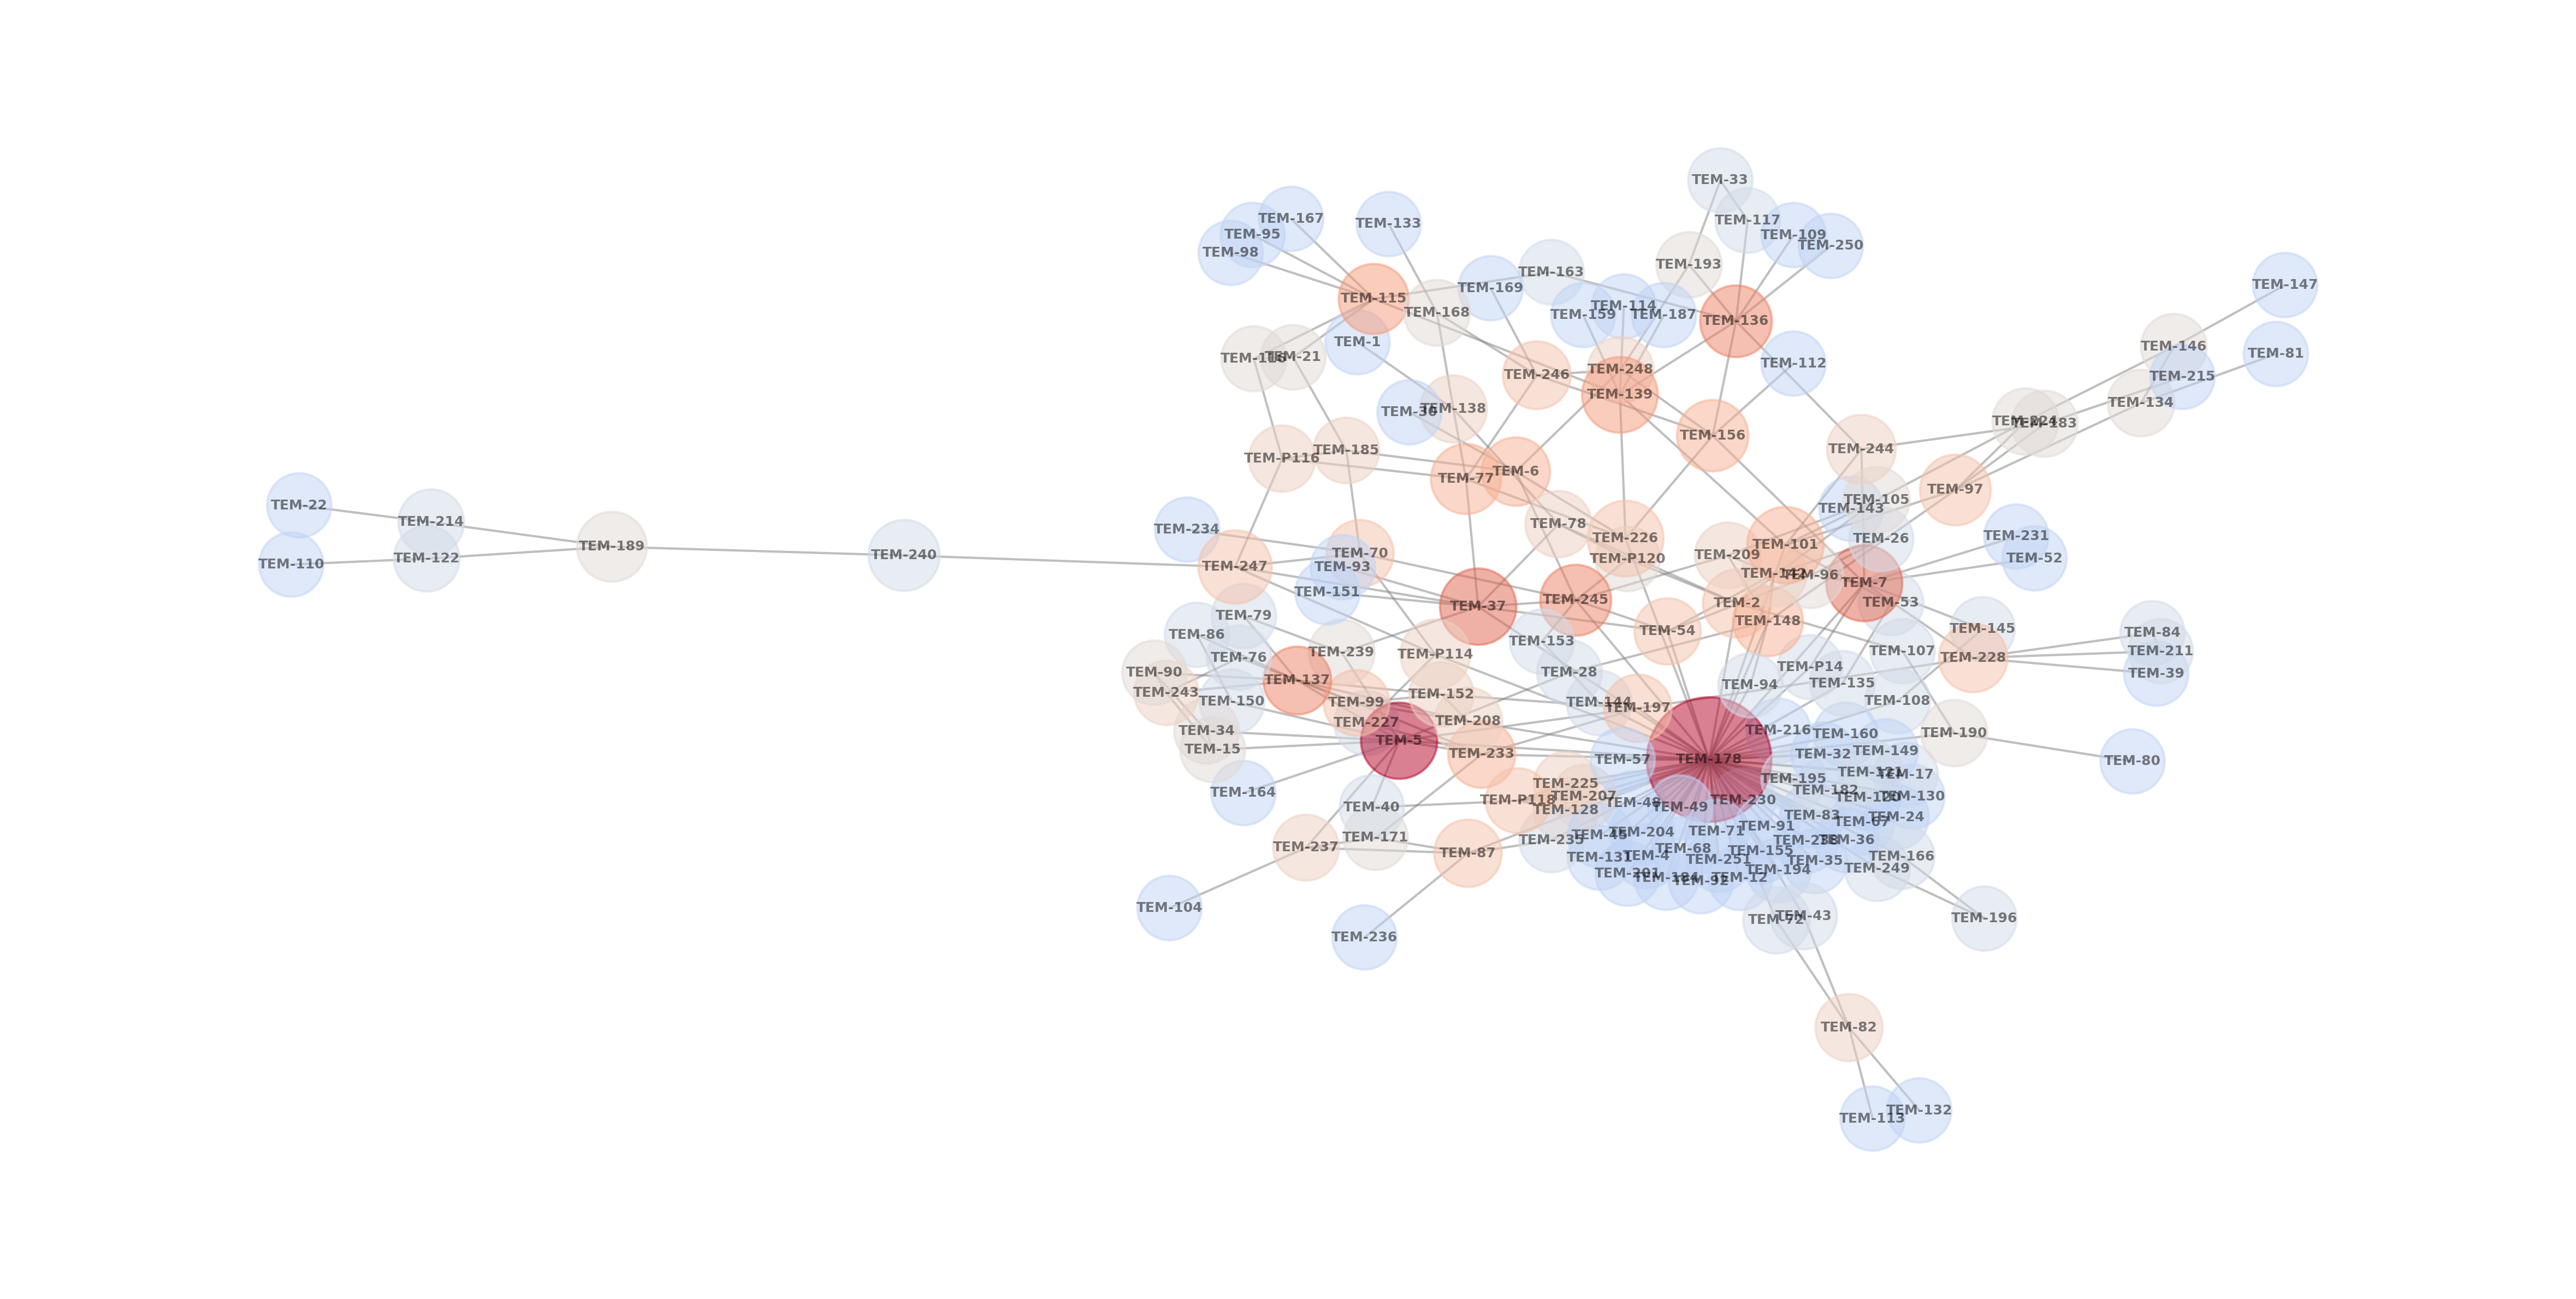

In [14]:
pos = nx.spring_layout(G, weight='TEM-Domain-Diff', iterations=100, seed=18)
plt.figure(figsize=(19,9))
nx.draw_networkx(G, pos=pos, with_labels=True, node_color=c, node_size=s,
                 font_color='Black',font_size='6', font_weight='bold', edge_color='grey', alpha=0.5, width=1)
plt.axis('off')

plt.show()

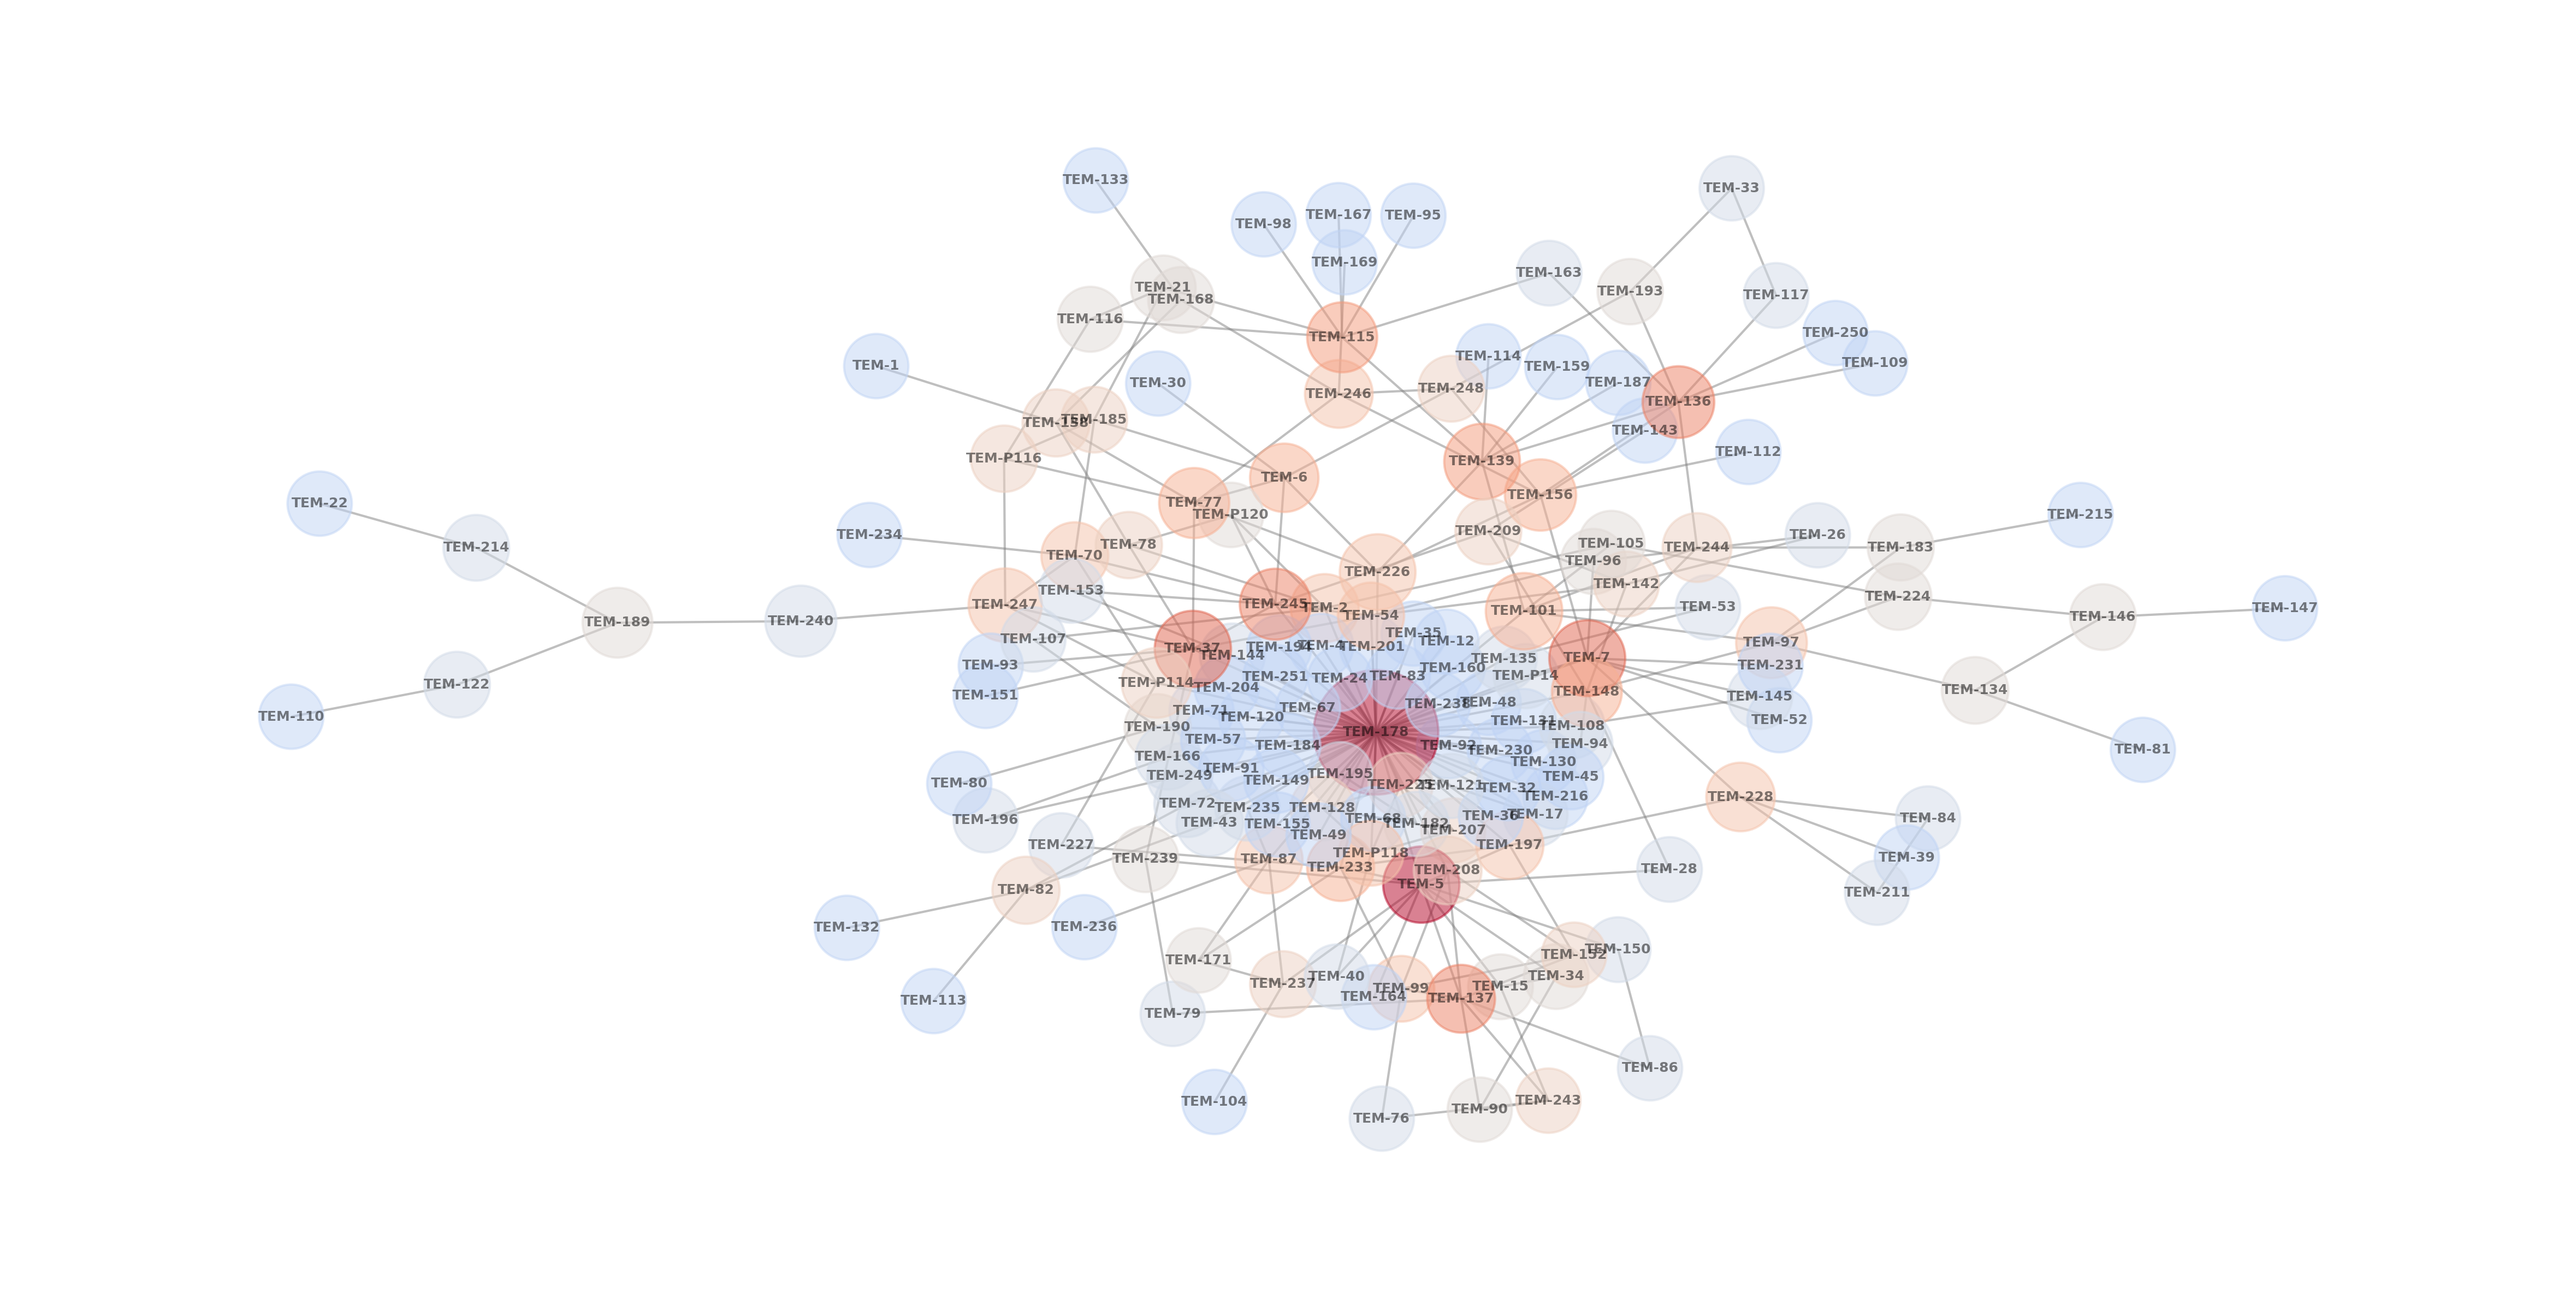

In [15]:
pos = nx.kamada_kawai_layout(G, weight='TEM-Domain-Diff')
plt.figure(figsize=(19,9))
nx.draw_networkx(G, pos=pos, with_labels=True, node_color=c, node_size=s,
                 font_color='Black',font_size='6', font_weight='bold', edge_color='grey', alpha=0.5, width=1)
plt.axis('off')

plt.show()

In [16]:
gen = ProteinRecord.get_id('')

Response could not be mapped to mapper: Supplied+id+parameter+is+empty.

IndexError: list index out of range